# __Простые цветовые фильтры__

In [1]:
import numpy as np 
import cv2

In [2]:
ORIG_PATH = './images/orig/'
NEW_PATH = './images/new/'

In [6]:
apple_bgr = cv2.imread(ORIG_PATH + "apple.png")

cv2.imshow("green apple", apple_bgr)
cv2.waitKey(0)

-1

__Функция преобразования из `RGB` в `HSV`__ <br>

`cv2.cvtColor(image, cv2.COLOR_BGR2HSV)`

In [7]:
apple_hsv = cv2.cvtColor(apple_bgr, cv2.COLOR_BGR2HSV)

cv2.imshow("green apple", apple_hsv)
cv2.waitKey(0)

-1

## __Функция для выделения цветового диапозона__

`inRange(img, color1, color2)` - Функция inRange позволяет наложить на кадр цветовой фильтр в заданном диапазоне. <br>

- `img` — изображение, на которое мы накладываем фильтр;
- `color1` — начальный цвет диапазона;
- `color2` — конечный цвет диапазона.

Например, чтобы выделить яблоко нам нужен именно диапазон цветов, а не один конкретный. Одна часть яблока может находиться в тени, а на другую в это время падает свет из окна. Значит нам интересен и светло-зеленый и темно-зеленый цвет, а также все оттенки между ними.

In [38]:
# Границы цветов HSV
# hsv_min = np.array((53, 0, 0), np.uint8)
# hsv_max = np.array((83, 255, 255), np.uint8)

hsv_min = np.array((35, 100, 100), np.uint8)
hsv_max = np.array((100, 255, 255), np.uint8)

apple_bgr = cv2.imread(ORIG_PATH + "apple.png")
apple_hsv = cv2.cvtColor(apple_bgr, cv2.COLOR_BGR2HSV)
thresh = cv2.inRange(apple_hsv, hsv_min, hsv_max)

cv2.imshow("filtered_apple", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

## __Определение центра по моментам__

Моменты изображения (англ. image moments) в компьютерном зрении, обработке изображений и смежных областях — некоторые частные средневзвешенные (момент) интенсивностей пикселей изображения, или функция таких моментов. Как правило, выбираются моменты, имеющие полезные свойства или интерпретации.

В самом общем смысле момент функции — это некая скалярная величина, которая характеризует эту функцию и может быть использована для артикуляции ее важных свойств. С математической точки зрения набор моментов является в некотором смысле «проекцией» функции на полиномиальный базис. Он аналогичен преобразованию Фурье, которое представляет из себя проекцию функции на базис из гармонических функций.

Моменты изображения полезны для описания объектов после сегментации. Простые свойства изображения, которые можно найти с помощью моментов, включают в себя площадь (или суммарную интенсивность), геометрический центр и информацию об ориентации. Кроме них в математической статистике давно применяются моменты более высоких порядков, например коэффициент асимметрии и коэффициент эксцесса.

Мы можем определить центр шарика при помощи графических моментов изображения, графический момент это чисто математический объект. Он определяется формулой:

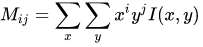


Но библиотека OpenCV снова о нас позаботилась, написав уже готовую функцию для определения графических моментов изображения:

In [40]:
M = cv2.moments(thresh)

Тогда центр интересующего нас объекта можно посчитать вот так:

In [41]:
center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

## __Практика__

В данной задаче необходимо найти центр интересующего нас объекта на 2х различных изображениях и вписать их в окружности.  Объект на картинках может легко отделяется от фона с помощью цветового фильтра (цвет объекта сильно отличается от цвета остальных пикселей). Примером первого изображения можно взять картинку из 1ой практики или это изображение:

In [62]:
watermelon_bgr = cv2.imread(ORIG_PATH + "watermelon.jpg")
bloon_bgr = cv2.imread(ORIG_PATH + "bloon.jpg")

watermelon_hsv = cv2.cvtColor(watermelon_bgr, cv2.COLOR_BGR2HSV)
bloon_hsv = cv2.cvtColor(bloon_bgr, cv2.COLOR_BGR2HSV)

# HSV ranges:
# yellow
y_min = np.array([20, 100, 100], np.uint8)
y_max = np.array([30, 255, 255], np.uint8)

# green
g_min = np.array((30, 0, 0), np.uint8)
g_max = np.array((110, 255, 255), np.uint8)

filtered_watermelon = cv2.inRange(watermelon_hsv, g_min, g_max)
filtered_bloon = cv2.inRange(bloon_hsv, y_min, y_max)

cv2.imshow("filtred watermelon", filtered_watermelon)
cv2.imshow("filtred bloon", filtered_bloon)
cv2.waitKey(0)

# Окружности
M_watermelon = cv2.moments(filtered_watermelon)
M_bloon = cv2.moments(filtered_bloon)

# Параметры
watermelon_center = (int(M_watermelon["m10"] / M_watermelon["m00"]), int(M_watermelon["m01"] / M_watermelon["m00"]))
bloon_center = (int(M_bloon["m10"] / M_bloon["m00"]), int(M_bloon["m01"] / M_bloon["m00"]))
print(watermelon_center, bloon_center)

R_watermelon = 300
R_bloon = 150
CIRCLE_COLOR = (0, 0, 255) 
CIRCLE_THICKNESS = 4      

# Рисование окружностей
cv2.circle(watermelon_bgr, watermelon_center, R_watermelon, CIRCLE_COLOR, CIRCLE_THICKNESS)
cv2.circle(bloon_bgr, bloon_center, R_bloon, CIRCLE_COLOR, CIRCLE_THICKNESS)

cv2.imshow("Original Watermelon (with circle)", watermelon_bgr)
cv2.imshow("Original Bloon (with circle)", bloon_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

(467, 311) (418, 284)
